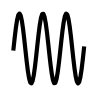

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6*np.pi, 60)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=3, color='black')
ax.axis('off')
fig.set_size_inches(1, 1)
plt.savefig("wave_icon.svg", format="svg", transparent=True)

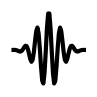

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1*np.pi, 1*np.pi, 60)
y = np.exp(-0.5*x**2) * np.cos(6*x)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=3, color='black')
ax.axis('off')
fig.set_size_inches(1, 1)
plt.savefig("gauss_wave_package.svg", format="svg", transparent=True)

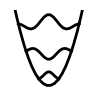

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the parabolic potential
V = lambda x: x**2  # Parabolic potential

# Define energy levels for n=0, 2, 4
E0, E2, E4 = 0.5, 2.5, 4.5

# Define the wavefunctions (normalized Hermite polynomials * Gaussian)
def hermite_gaussian(x, n):
    """Hermite-Gaussian wavefunction for quantum harmonic oscillator"""
    if n == 0:
        H = 1
    elif n == 2:
        H = 4 * x**2 - 2
    elif n == 4:
        H = 16 * x**4 - 48 * x**2 + 12
    else:
        raise ValueError("Only n=0, 2, 4 are supported in this example.")
    
    psi = (1/np.pi)**(1/4) * (1/np.sqrt(2**n * math.factorial(n))) * \
          np.exp(-x**2/2) * H
    return psi

# Increase magnitude for better visibility
scale = 0.5  # Increased from 0.3

# Find x limits where wavefunctions would intersect with parabola
# For energy E, the classical turning points are at x = ±sqrt(E)
x0_max = np.sqrt(E0)
x2_max = np.sqrt(E2)
x4_max = np.sqrt(E4)

# Create x arrays for each wavefunction that go exactly to the turning points
x0 = np.linspace(-x0_max, x0_max, 20)
x2 = np.linspace(-x2_max, x2_max, 20)
x4 = np.linspace(-x4_max, x4_max, 20)

# Scale x coordinates to make wavefunctions fit better in the "well"
# This creates a more square-well-like appearance
x0_scaled = x0 * (np.pi / (2 * x0_max))
x2_scaled = x2 * (np.pi / (2 * x2_max))
x4_scaled = x4 * (np.pi / (2 * x4_max))

# Calculate wavefunctions with scaled coordinates
psi0 = hermite_gaussian(x0_scaled, 0) * np.cos(x0_scaled)
psi2 = hermite_gaussian(x2_scaled, 2) * np.cos(x2_scaled)
psi4 = hermite_gaussian(x4_scaled, 4) * np.cos(x4_scaled)

# Normalize to ensure wavefunctions go to zero at boundaries
psi0 = psi0 / np.max(np.abs(psi0))
psi2 = psi2 / np.max(np.abs(psi2))
psi4 = psi4 / np.max(np.abs(psi4))

# Scale and shift wavefunctions to their energy levels
# Increase scale for n=2 and n=4 to raise them slightly
y0 = E0 + scale * psi0
y2 = E2 + scale * 1.15 * psi2  # 15% higher
y4 = E4 + scale * 1.3 * psi4   # 30% higher

# Ensure endpoints are exactly on the parabola
y0[0] = V(x0[0])
y0[-1] = V(x0[-1])
y2[0] = V(x2[0])
y2[-1] = V(x2[-1])
y4[0] = V(x4[0])
y4[-1] = V(x4[-1])

fig, ax = plt.subplots()

# Plot the parabolic potential
x_potential = np.linspace(-2.5, 2.5, 20)
V_potential = V(x_potential)
ax.plot(x_potential, V_potential, 'black', linewidth=2)

# Plot the wavefunctions
ax.plot(x0, y0, 'black', linewidth=2)
ax.plot(x2, y2, 'black', linewidth=2)
ax.plot(x4, y4, 'black', linewidth=2)

ax.set_xlim(-2.7, 2.7)
ax.set_ylim(-0.1, 5.5)
ax.axis('off')
fig.set_size_inches(1, 1)
plt.savefig("quantum_harmonic_oscillator.svg", format="svg", transparent=True)

In [15]:
# Script to clean SVG files and ensure they work with CustomLucideIcon
import re
import os

def clean_svg_for_lucide(filepath):
    """Clean SVG file to work properly with CustomLucideIcon component"""
    with open(filepath, 'r') as f:
        content = f.read()
    
    # Replace black stroke color with currentColor
    content = re.sub(r'stroke: #000000', 'stroke: currentColor"', content)
    content = re.sub(r'stroke: #000"', 'stroke: currentColor"', content)
    content = re.sub(r'stroke: black"', 'stroke: currentColor"', content)
    content = re.sub(r"stroke: #000000'", "stroke: 'currentColor'", content)
    content = re.sub(r"stroke: #000'", "stroke: 'currentColor'", content)
    content = re.sub(r"stroke: black'", "stroke: 'currentColor'", content)
    
    # Remove fill or set to none (matplotlib might add some)
    content = re.sub(r'fill: [^"]*"', 'fill: none"', content)
    content = re.sub(r"fill: [^']*'", "fill: none'", content)
    
    # Remove the patch_1 group (background rectangle)
    content = re.sub(r'<g id="patch_1">.*?</g>\s*', '', content, flags=re.DOTALL)
    
    # Ensure stroke attributes are present for better compatibility
    if 'stroke-linecap' not in content:
        content = content.replace('<g id="line2d_1">', '<g id="line2d_1" stroke-linecap="round">')
    if 'stroke-linejoin' not in content:
        content = content.replace('<g id="line2d_1"', '<g id="line2d_1" stroke-linejoin="round"')
    
    with open(filepath, 'w') as f:
        f.write(content)
    
    print(f"Cleaned {filepath}")

# Get all SVG files in the current directory
svg_files = [f for f in os.listdir('.') if f.endswith('.svg')]

# Clean each SVG file
for svg_file in svg_files:
    clean_svg_for_lucide(svg_file)

print(f"Cleaned {len(svg_files)} SVG files total")


Cleaned wave_icon.svg
Cleaned gauss_wave_package.svg
Cleaned quantum_harmonic_oscillator.svg
Cleaned 3 SVG files total
